# Handwritten Alphabets recognition

In [12]:
from emnist import extract_training_samples
from emnist import extract_test_samples
from emnist import list_datasets
from keras.datasets import mnist

In [13]:
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np
import cv2

# Load and Process data

In [7]:
# load dataset
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')

# reshape data
x_train = x_train.reshape(len(x_train),28,28,1) / 255
x_test = x_test.reshape(len(x_test),28,28,1) / 255

# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(124800, 28, 28, 1)(124800, 27)(20800, 28, 28, 1)(20800, 27)


# Convolution Neural Network Model

In [9]:
# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(27, activation='softmax'))

# Compile the model using accuracy metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train and Save model

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)
model.save('handwritten_alphabets.h5')

ETA: 13s - loss: 0.1343 - accuracy: 0.952110464/124800 [=========================>....] - ETA: 13s - loss: 0.1342 - accuracy: 0.952110528/124800 [=========================>....] - ETA: 13s - loss: 0.1342 - accuracy: 0.952110592/124800 [=========================>....] - ETA: 12s - loss: 0.1342 - accuracy: 0.952110656/124800 [=========================>....] - ETA: 12s - loss: 0.1341 - accuracy: 0.952110720/124800 [=========================>....] - ETA: 12s - loss: 0.1341 - accuracy: 0.952110784/124800 [=========================>....] - ETA: 12s - loss: 0.1341 - accuracy: 0.952110848/124800 [=========================>....] - ETA: 12s - loss: 0.1341 - accuracy: 0.952110912/124800 [=========================>....] - ETA: 12s - loss: 0.1342 - accuracy: 0.952110976/124800 [=========================>....] - ETA: 12s - loss: 0.1341 - accuracy: 0.952111040/124800 [=========================>....] - ETA: 12s - loss: 0.1340 - accuracy: 0.952111104/124800 [=========================>....] - ETA: 12s -

# Testing the model

[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


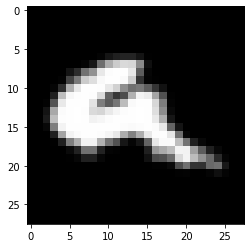

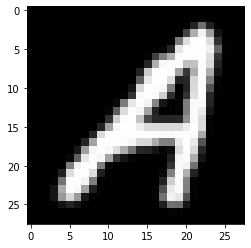

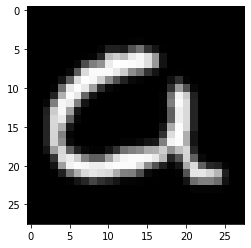

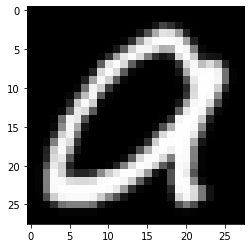

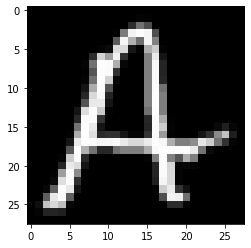

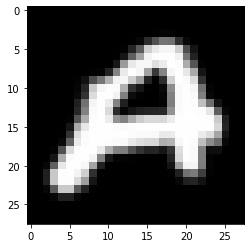

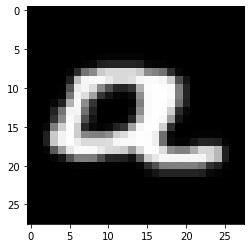

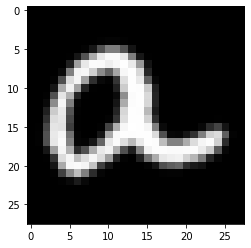

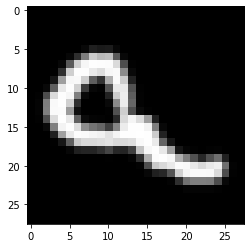

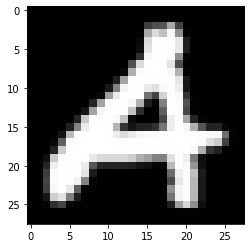

In [11]:
# load the trained model
mod = load_model('handwritten_alphabets.h5')

n = 10 # test size

# do predictions
predictions = mod.predict(x_test[:n])
print(np.argmax(predictions,axis = 1))
print(np.argmax(y_test[:n],axis = 1))

for i in range(n):
  first_image = x_test[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()